In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

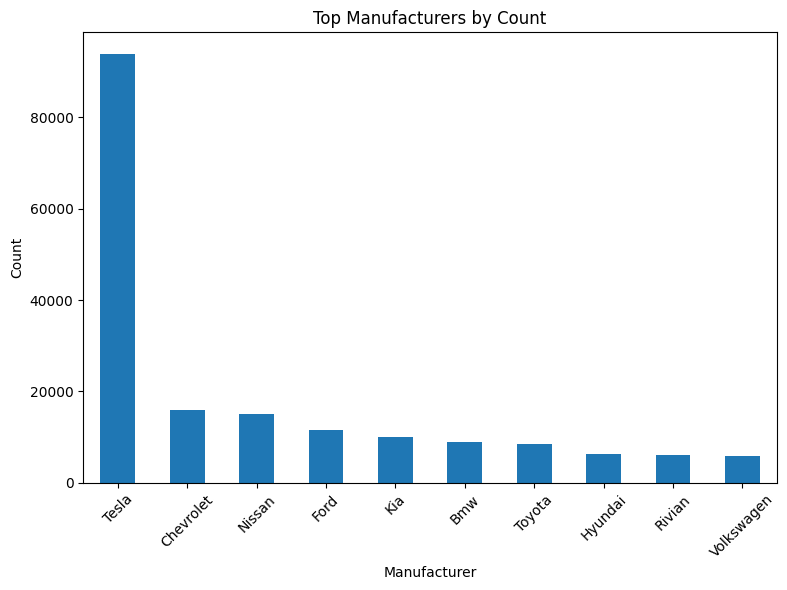

In [2]:
# 1. Which electric vehicle manufacturers sell the most in Washington?

n = 10 # amount of makes in manufacturer_count
manufacturer_count = df['Make'].value_counts().head(n)
manufacturer_count

# Get the manufacturer count
manufacturer_count = df['Make'].value_counts().head(n)

# Create the bar chart
plt.figure(figsize=(8, 6))
ax = manufacturer_count.plot(kind='bar')  # Save the axis object to change formatting
plt.title('Top Manufacturers by Count')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Change x-axis labels to lowercase
ax.set_xticklabels([label.get_text().capitalize() for label in ax.get_xticklabels()])
plt.tight_layout()
plt.show()


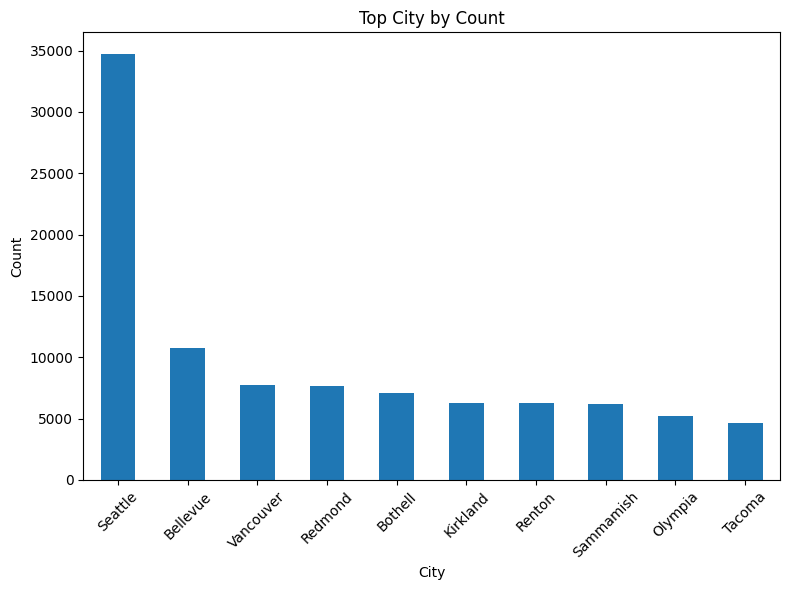

In [3]:
# 2. Which city has the most electric vehicles?

n = 10
city_count = df['City'].value_counts().head(n)
city_count # probably correlates with population

# Create the bar chart
plt.figure(figsize=(8, 6))
city_count.plot(kind='bar')
plt.title('Top City by Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Percentage of cars that are Battery Electric Vehicles: 78.97%
Percentage of cars that are Plug-in Hybrid Electric Vehicles: 21.03%
Battery Electric Vehicles is the more prevelant type.


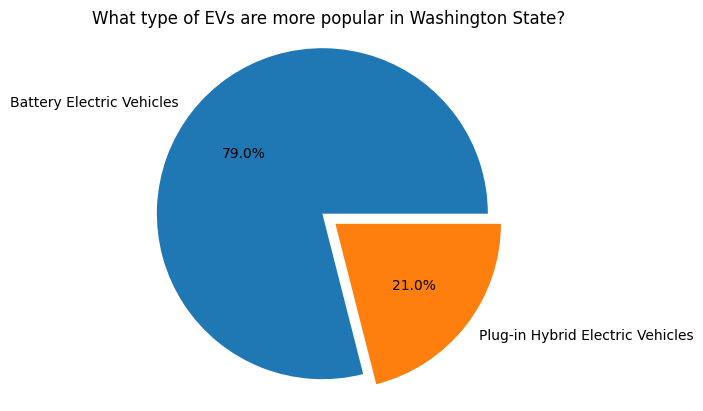

In [4]:
# 3. ⁠What percentage of electric vehicles are hybrid or fully electric? Which is more prevalent?

n = 10
vehicle_type_count = df['Electric Vehicle Type'].value_counts()
BEV = vehicle_type_count.values[0] # Battery Electric Vehicle
PHEV = vehicle_type_count.values[1] # Plug-in Hybrid Electric Vehicle
total = BEV + PHEV

more_prevelant = "Battery Electric Vehicles" if BEV > PHEV else "Plug-in Hybrid Electric Vehicles"

print(f"Percentage of cars that are Battery Electric Vehicles: {BEV/total:.2%}")
print(f"Percentage of cars that are Plug-in Hybrid Electric Vehicles: {PHEV/total:.2%}")
print(f"{more_prevelant} is the more prevelant type.")

# Create pie chart
plt.pie([BEV,PHEV], labels = ["Battery Electric Vehicles","Plug-in Hybrid Electric Vehicles"], 
        explode = (.1,0), autopct='%1.1f%%')

plt.axis('equal')  

# Display the chart
plt.title("What type of EVs are more popular in Washington State?")
plt.show()

In [ ]:
# 4. ⁠Which models offer the longest and shortest electric range?

df['Electric Range'] = df['Electric Range'].replace(0, np.nan) # 
df = df.dropna(subset=['Electric Range'])

df_subset = df[['Model', 'Electric Range']]

max_range_index = df_subset['Electric Range'].idxmax()

max_range_row = df_subset.loc[max_range_index]

print("Model with the longest electric range:")
print("Model:", max_range_row['Model'])
print("Electric Range:", max_range_row['Electric Range'], "miles")

min_range_index = df_subset['Electric Range'].idxmin()

min_range_row = df_subset.loc[min_range_index]

print("Model with the shortest electric range:")
print("Model:", min_range_row['Model'])
print("Electric Range:", min_range_row['Electric Range'], "miles")

Model with the longest electric range:
Model: MODEL S
Electric Range: 337.0 miles
Model with the shortest electric range:
Model: PRIUS PLUG-IN
Electric Range: 6.0 miles
          Model  Electric Range       Range Category
0          LEAF            75.0   Short-Range(0-100)
1       MODEL S           270.0  Long-Range(201-300)
3   PRIUS PRIME            25.0   Short-Range(0-100)
4         C-MAX            19.0   Short-Range(0-100)
5       MODEL 3           266.0  Long-Range(201-300)
6       MODEL S           249.0  Long-Range(201-300)
7      WRANGLER            21.0   Short-Range(0-100)
8            X3            17.0   Short-Range(0-100)
9          LEAF            73.0   Short-Range(0-100)
10      MODEL 3           322.0    Ultra-Range(301+)
11         LEAF            75.0   Short-Range(0-100)


In [6]:
# 5. What’s the correlation between vehicle range and the year?
n = 9
bins = [0, 100, 200, 300, float('inf')] 
labels = ['Short-Range(0-100)', 'Mid-Range(101-200)', 'Long-Range(201-300)', 'Ultra-Range(301+)']  

df['Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=True)

print(df[['Model', 'Electric Range', 'Range Category']].head(n))

         Model  Electric Range       Range Category
0         LEAF            75.0   Short-Range(0-100)
1      MODEL S           270.0  Long-Range(201-300)
3  PRIUS PRIME            25.0   Short-Range(0-100)
4        C-MAX            19.0   Short-Range(0-100)
5      MODEL 3           266.0  Long-Range(201-300)
6      MODEL S           249.0  Long-Range(201-300)
7     WRANGLER            21.0   Short-Range(0-100)
8           X3            17.0   Short-Range(0-100)
9         LEAF            73.0   Short-Range(0-100)


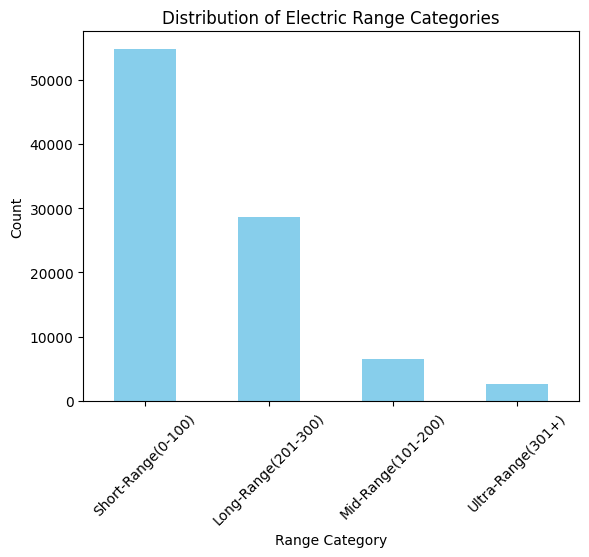

In [8]:
import matplotlib.pyplot as plt

df['Range Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Electric Range Categories")
plt.xticks(rotation=45)
plt.xlabel("Range Category")
plt.ylabel("Count")
plt.show()

In [9]:
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)

median_range = df['Electric Range'].median()
df['Electric Range'] = df['Electric Range'].fillna(median_range)

Correlation between Electric Range and Model Year: -0.16


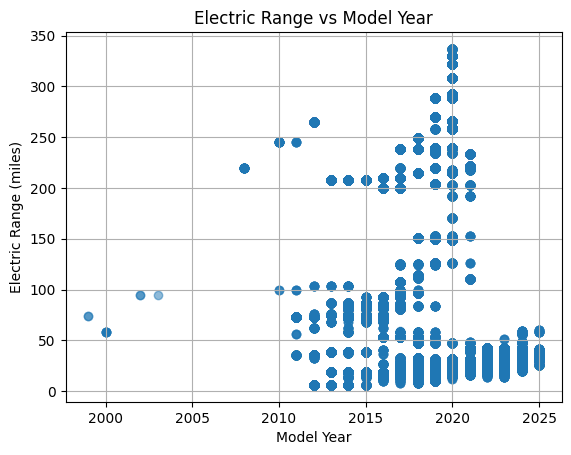

In [10]:
correlation_matrix = df[['Electric Range', 'Model Year']].corr()  
correlation = correlation_matrix.loc['Electric Range', 'Model Year']  
print("Correlation between Electric Range and Model Year:", round(correlation, 2))  

import matplotlib.pyplot as plt

plt.scatter(df['Model Year'], df['Electric Range'], alpha=0.5)  
plt.title("Electric Range vs Model Year") 
plt.xlabel("Model Year")  
plt.ylabel("Electric Range (miles)") 
plt.grid(True)
plt.show()